In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
% matplotlib inline

# 1. Data Visualization and Feature Engineering

In [2]:
all_data = pd.read_csv('./treatmentGroup0506.csv')

In [3]:
all_data.columns

Index(['Unnamed: 0', 'community', 'id', 'members', 'attendAsembly', 'memOrg',
       'income', 'monthInstall', 'primaryEd', 'secondaryEd', 'owner',
       'yearsInHome', 'control', 'treatNoBonus', 'treatBonus', 'waterScarce',
       'waterOK', 'houseType', 'age', 'numShowers', 'numSinks', 'numKitchen',
       'showerTime', 'showerFreq', 'sinkTime', 'sinkFreq', 'kitchenTime',
       'maxInstall', 'numInstalled', 'cleanShower', 'cleanKitchen',
       'cleanSink', 'leaks', 'savings', 'sameFamily', 'totalDisadopt',
       'partialDisadopt', 'noDisadopt', 'meanUsage', 'perCapitaUsage',
       'kitchenExpectation', 'sinkExpectation', 'showerExpectation',
       'cleanSum'],
      dtype='object')

In [4]:
all_data = all_data.drop(['noDisadopt'], axis=1)
all_data = all_data.drop(['numInstalled'], axis=1)

In [5]:
all_data.head(10)

,Unnamed: 0,community,id,members,attendAsembly,memOrg,income,monthInstall,primaryEd,secondaryEd,...,savings,sameFamily,totalDisadopt,partialDisadopt,meanUsage,perCapitaUsage,kitchenExpectation,sinkExpectation,showerExpectation,cleanSum
0,1,25.0,25002.0,1.0,0.0,0.0,3.0,6.0,1.0,0.0,...,5.0,1.0,0.0,1.0,18.818182,18.818182,3.0,NaN,3.0,0.0
1,3,25.0,25004.0,4.0,0.0,0.0,4.0,6.0,0.0,0.0,...,4.0,1.0,0.0,0.0,16.969697,4.242424,2.7,NaN,4.7,1.0
2,6,25.0,25007.0,4.0,0.0,0.0,2.0,6.0,0.0,0.0,...,4.0,1.0,0.0,0.0,15.947368,3.986842,7.0,NaN,8.2,1.0
3,17,25.0,25018.0,3.0,1.0,1.0,3.0,6.0,1.0,0.0,...,4.0,1.0,0.0,1.0,28.438596,9.479532,5.3,2.7,4.7,3.0
4,18,25.0,25019.0,5.0,1.0,0.0,4.0,6.0,1.0,1.0,...,1.0,1.0,0.0,1.0,21.017544,4.203509,2.0,2.0,2.0,3.0
5,19,25.0,25020.0,3.0,0.0,0.0,5.0,6.0,1.0,0.0,...,1.0,1.0,1.0,0.0,50.368421,16.789474,2.0,NaN,2.0,2.0
6,20,25.0,25021.0,2.0,0.0,0.0,NaN,6.0,1.0,0.0,...,1.0,1.0,0.0,1.0,15.719298,7.859649,3.0,NaN,2.0,1.0
7,23,25.0,25024.0,4.0,0.0,0.0,2.0,6.0,1.0,1.0,...,1.0,1.0,0.0,0.0,18.157895,4.539474,2.2,2.2,2.2,0.0
8,24,25.0,25025.0,2.0,1.0,0.0,2.0,6.0,1.0,0.0,...,1.0,1.0,0.0,1.0,21.175439,10.587719,3.0,NaN,5.0,2.0
9,31,25.0,25032.0,5.0,1.0,0.0,3.0,6.0,1.0,0.0,...,4.0,1.0,0.0,0.0,20.508772,4.101754,5.0,NaN,5.0,2.0


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 42 columns):
Unnamed: 0            812 non-null int64
community             812 non-null float64
id                    812 non-null float64
members               812 non-null float64
attendAsembly         812 non-null float64
memOrg                812 non-null float64
income                751 non-null float64
monthInstall          812 non-null float64
primaryEd             812 non-null float64
secondaryEd           812 non-null float64
owner                 812 non-null float64
yearsInHome           812 non-null float64
control               812 non-null float64
treatNoBonus          812 non-null float64
treatBonus            812 non-null float64
waterScarce           812 non-null float64
waterOK               812 non-null float64
houseType             812 non-null float64
age                   812 non-null float64
numShowers            812 non-null float64
numSinks              812 non-null fl

In [7]:
all_data.describe()

,Unnamed: 0,community,id,members,attendAsembly,memOrg,income,monthInstall,primaryEd,secondaryEd,...,savings,sameFamily,totalDisadopt,partialDisadopt,meanUsage,perCapitaUsage,kitchenExpectation,sinkExpectation,showerExpectation,cleanSum
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,751.000000,812.000000,812.000000,812.000000,...,771.000000,812.000000,812.000000,812.000000,808.000000,808.000000,516.000000,354.000000,686.000000,812.000000
mean,1163.363300,45.055419,45213.282020,3.725369,0.391626,0.146552,3.001332,5.910099,0.801724,0.258621,...,4.199741,0.949507,0.203202,0.293103,24.534944,7.613005,4.346318,4.811582,4.573907,1.600985
std,635.386533,13.341503,13336.226856,1.796612,0.488415,0.353876,1.191637,0.695624,0.398947,0.438147,...,2.019142,0.219094,0.402630,0.455466,13.506054,5.157397,2.170716,2.186647,2.227939,1.003520
min,1.000000,25.000000,25002.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.755556,0.755556,2.000000,2.000000,2.000000,0.000000
25%,664.750000,35.000000,35083.750000,2.000000,0.000000,0.000000,2.000000,5.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,15.552632,4.433333,2.600000,3.000000,3.000000,1.000000
50%,1179.000000,36.000000,36407.000000,4.000000,0.000000,0.000000,3.000000,6.000000,1.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,21.973684,6.341667,4.000000,4.600000,4.000000,2.000000
75%,1715.000000,64.000000,64021.000000,5.000000,1.000000,0.000000,4.000000,6.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,29.947368,8.959649,5.200000,6.000000,5.500000,2.000000
max,2245.000000,66.000000,66293.000000,11.000000,1.000000,1.000000,5.000000,7.000000,1.000000,1.000000,...,7.000000,1.000000,1.000000,1.000000,109.947368,67.508772,9.000000,9.000000,9.000000,3.000000


In [8]:
y_tot = all_data['totalDisadopt']
y_par = all_data['partialDisadopt']


In [9]:
# Table: percentage of missing data, in descending order
total = all_data.isnull().sum().sort_values(ascending=False)
percentage = (all_data.isnull().sum() / all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys = ['Total_missing', 'percentage'])

missing_data

,Total_missing,percentage
sinkExpectation,458,0.564039
sinkTime,448,0.551724
sinkFreq,448,0.551724
kitchenExpectation,296,0.364532
kitchenTime,279,0.343596
showerExpectation,126,0.155172
showerFreq,100,0.123153
showerTime,100,0.123153
income,61,0.075123
leaks,41,0.050493


## My suggestion on handling missing data (need to discuss):
0. Overwriting rule : do visualization first. if feature is not useful, don't border filling in missing cause not going to help anyway.
1. For those with very limited missing data(mean usage, perCapitalUsage, fill in mean value.
2. For those up to approx. 15% missing data, fill in using RFR(RandomForest Regressor), or mean value, or whatever else.
3. For those with high missing data percentage (>15%), convert to binary class s.t. missing = 1 and not missing = 0, w.r.t each feature.(because, the very fact that data is missing/not missing may actually render that feature w.r.t. distribution not being i.i.d., hence filling value as if they were i.i.d. distributed make no sense. However, binary classification treatment make sense.)

In [10]:
def set_feature_type(df, feature):
    """A helper function to make feature with high percentage of 
    missing data into binary class.
    """
    df.loc[(df[feature].notnull()), feature] = '1'
    df.loc[(df[feature].isnull()), feature] = '0'
    return df


In [11]:
high_perc_missing = ['sinkExpectation', 'sinkTime', 'sinkFreq', 'kitchenExpectation', 'kitchenTime', 'showerExpectation']
for feature in high_perc_missing:
    all_data = set_feature_type(all_data, feature)
    

In [12]:
# double check
all_data.isnull().sum().sort_values(ascending=False)

showerTime            100
showerFreq            100
income                 61
savings                41
leaks                  41
perCapitaUsage          4
meanUsage               4
cleanSum                0
owner                   0
waterScarce             0
treatBonus              0
treatNoBonus            0
control                 0
yearsInHome             0
monthInstall            0
secondaryEd             0
primaryEd               0
houseType               0
memOrg                  0
attendAsembly           0
members                 0
id                      0
community               0
waterOK                 0
numSinks                0
age                     0
cleanKitchen            0
sinkExpectation         0
kitchenExpectation      0
partialDisadopt         0
totalDisadopt           0
sameFamily              0
cleanSink               0
cleanShower             0
numShowers              0
maxInstall              0
kitchenTime             0
sinkFreq                0
sinkTime    

In [13]:
# fill in meanUsage, perCapitalUsage with mean value
def fill_feature_value(df, feature):
    df.loc[ (df[feature].isnull()), feature ] = df[feature].mean()
    return df


In [14]:
feat_fill_val = ['meanUsage', 'perCapitaUsage']

for feature in feat_fill_val:
    all_data = fill_feature_value(all_data, feature)




In [15]:
# double check missing data
all_data.isnull().sum().sort_values(ascending=False)

showerTime            100
showerFreq            100
income                 61
savings                41
leaks                  41
cleanSum                0
owner                   0
waterOK                 0
waterScarce             0
treatBonus              0
treatNoBonus            0
control                 0
yearsInHome             0
primaryEd               0
secondaryEd             0
age                     0
monthInstall            0
memOrg                  0
attendAsembly           0
members                 0
id                      0
community               0
houseType               0
numSinks                0
numShowers              0
showerExpectation       0
sinkExpectation         0
kitchenExpectation      0
perCapitaUsage          0
meanUsage               0
partialDisadopt         0
totalDisadopt           0
sameFamily              0
cleanSink               0
cleanKitchen            0
cleanShower             0
maxInstall              0
kitchenTime             0
sinkFreq    

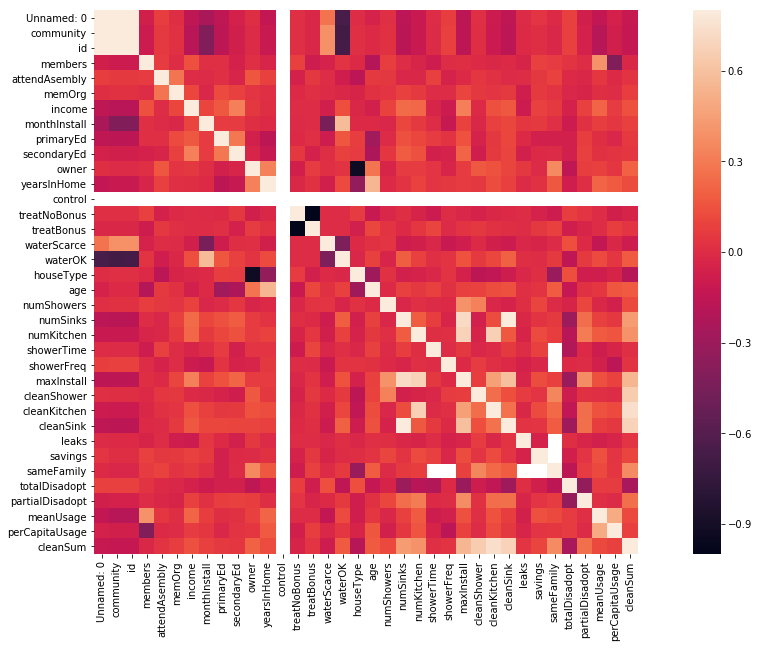

In [16]:
# now, time for heat map
corrmat = all_data.corr()
fig = plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

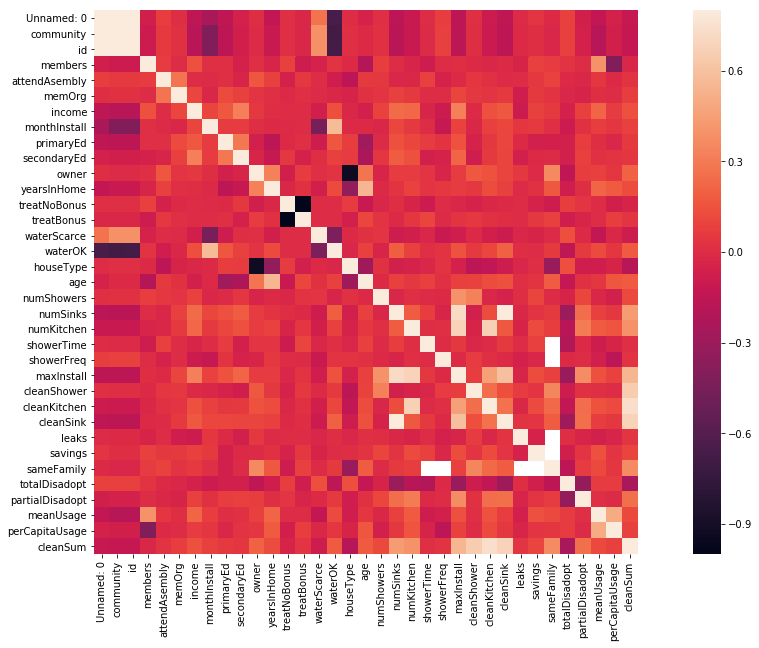

In [17]:
# control is doing nothing, all whiten out,  drop it, re-plot
all_data = all_data.drop(['control'], axis=1)
corrmat = all_data.corr()
corrmat_abs = pd.DataFrame.abs(corrmat)
fig = plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True)


In [18]:
# let's use top 10 co-related features w.r.t. each missing feat 
remaining_missing_feats = all_data.columns[all_data.isnull().any()].tolist()
print(remaining_missing_feats)

# k = 4 # excluding one related to itself
# related_feat_dict = {} # related feature dictionary i.e. {missing_feat_1:[related features as list ]}

# for feat in remaining_missing_feats:
#     cols = corrmat_abs.nlargest(k, feat)[feat].index.tolist()
#     cols.remove(feat)
#     try:
#         cols.remove('partialDisadopt')
#     except:
#         pass
#     try: 
#         cols.remove('totalDisadopt')
#     except:
#         pass
        
#     for feat_2 in remaining_missing_feats:
#         try: 
#             cols.remove(feat_2)
#         except:
#             pass
    
            
#     related_feat_dict[feat] = cols
 

# # see what we got
# print(related_feat_dict)



['income', 'showerTime', 'showerFreq', 'leaks', 'savings']


In [19]:
# try filling in with avg
for feat in remaining_missing_feats:
    all_data = fill_feature_value(all_data, feat)
    

In [20]:
# how we can use rfr method to fill in missing labels
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# fill in the rest of missing data with rfr
def rfr_fit_missing(df, feature, related_features, n_est=2000):
    """RandomForestRegressor for filling feature with missing value.
    feature: feature with missing value need to fill
    related_features: pre-determined features relating to feature
    """

    group_features = related_features.copy()
    group_features.append(feature)
    temp_df = df[group_features]
    print(temp_df.head())
    
    known = temp_df[temp_df[feature].notnull()].as_matrix()
    unknown = temp_df[temp_df[feature].isnull()].as_matrix()
    
    y = known[:, -1]
    X = known[:, :-2]
    
    print(X)
    
    # use rfr to find pattern between X and y, for predicting missing feature
    rfr = RandomForestRegressor(random_state=101, n_estimators=n_est, n_jobs=-1)
    rfr.fit(X, y)
    
    # predict missing feature
    pred = rfr.predict(unknown[:, :-2])
    
    # fill in missing
    df.loc[(df[feature].isnull()), feature] = pred
    
    return df, rfr



In [21]:
# we need to record rft w.r.t. each feature, so we can use it in test
# rfr_dict = {}
# for feat in remaining_missing_feats:
#     all_data, rfr = rfr_fit_missing(all_data, feat, related_feat_dict[feat])
#     rfr_dict[feat] = rfr

In [22]:
# double check to make got no missing value right now
all_data.isnull().sum()

Unnamed: 0            0
community             0
id                    0
members               0
attendAsembly         0
memOrg                0
income                0
monthInstall          0
primaryEd             0
secondaryEd           0
owner                 0
yearsInHome           0
treatNoBonus          0
treatBonus            0
waterScarce           0
waterOK               0
houseType             0
age                   0
numShowers            0
numSinks              0
numKitchen            0
showerTime            0
showerFreq            0
sinkTime              0
sinkFreq              0
kitchenTime           0
maxInstall            0
cleanShower           0
cleanKitchen          0
cleanSink             0
leaks                 0
savings               0
sameFamily            0
totalDisadopt         0
partialDisadopt       0
meanUsage             0
perCapitaUsage        0
kitchenExpectation    0
sinkExpectation       0
showerExpectation     0
cleanSum              0
dtype: int64

In [23]:
# print (rfr_dict)

## By so far we fill in all missing values of 3 different cases
1. very few missing data, fill in avg
2. large percentage missing data, transfer to binary class
3. moderage percentage missing data: rfr with top 10(or less) correlated features

Continue feature engineering



In [24]:
# re-plot heat map with filled in in missing data

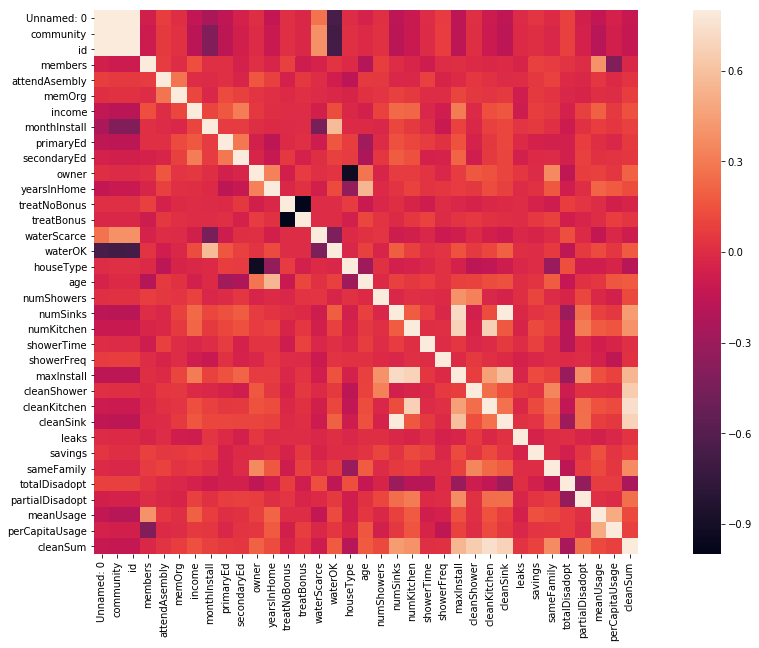

In [25]:
corrmat = all_data.corr()
corrmat_abs = pd.DataFrame.abs(corrmat)
fig = plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [26]:

k = 11 # excluding one related to itself
related_pred_feat_dict = {} # related feature dictionary i.e. {tatalDis or partialDis:[related features as list ]}

feat_lab = ['totalDisadopt', 'partialDisadopt']
for feat in feat_lab:
    cols = corrmat_abs.nlargest(k, feat)[feat].sort_values(ascending=False).index.tolist()
    cols.remove(feat)         
    
    if feat == 'totalDisadopt':
        try:
            cols.remove('partialDisadopt')
        except:
            continue
    else:
        try:
            cols.remove('totalDisadopt')
        except:
            continue
        
        
    related_pred_feat_dict[feat] = cols
 

# see what we got
print(related_pred_feat_dict)

# Q: what is Unnamed: 0? Can we delete it?


{'partialDisadopt': ['maxInstall', 'numKitchen', 'cleanSum', 'cleanSink', 'numSinks', 'cleanKitchen', 'numShowers', 'income', 'secondaryEd'], 'totalDisadopt': ['maxInstall', 'numSinks', 'cleanSink', 'cleanSum', 'showerTime', 'numKitchen', 'sameFamily', 'waterOK', 'owner']}


In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 41 columns):
Unnamed: 0            812 non-null int64
community             812 non-null float64
id                    812 non-null float64
members               812 non-null float64
attendAsembly         812 non-null float64
memOrg                812 non-null float64
income                812 non-null float64
monthInstall          812 non-null float64
primaryEd             812 non-null float64
secondaryEd           812 non-null float64
owner                 812 non-null float64
yearsInHome           812 non-null float64
treatNoBonus          812 non-null float64
treatBonus            812 non-null float64
waterScarce           812 non-null float64
waterOK               812 non-null float64
houseType             812 non-null float64
age                   812 non-null float64
numShowers            812 non-null float64
numSinks              812 non-null float64
numKitchen            812 non-null fl

So above is, roughly speaking, how "important" is each feature w.r.t. totalDisadopt and partial disadopt, with such "importance" ranked in descending order as stored in dictionary, deteremined as it is in heat map.

# let's examine 2 groups of correlations pairwise to see more clearly
# again, is ID useful ? i.e. how is it chosen, is there any hidden pattern there w.r.t. label y?
sns.set()
total_dis_group = ['maxInstall', 'numSinks', 'cleanSink', 'cleanSum', 'showerTime', 'numKitchen', 'sameFamily', 'waterOK', 'owner']

sns.pairplot(all_data[total_dis_group], size=5, kind='scatter', diag_kind='hist')
  
plt.show()

sns.pairplot(all_data[total_dis_group], size=5, kind='reg', diag_kind='kde')
plt.show()

The reason why i'm doing pairwise plot is to figure out correlation pattern between features used for prediction s.t. we may refer back to such pattern as needed (i.e. if we find two features being closely correlated, we may sometimes find that just using one of the two features for training and predicting beneficial, the potential gain for doing this is to reduce the noise being introduced to training and prediction phase while not loosing much information. 

However, as all the data as discretized (don't know why is it done that way, my thinking is, it would be beneficial to maintain the raw data as it is - to keep as much information as possible s.t. we may gain more insight into the data,  - especially if it was continuous/can be obtained in continous fashion in the first place).

At this stage, as all data are discretized, I don't see a useful correlation pattern between pairwise trainng features - though we can train our model and make predictions, still, we might have already lost something.


# Repeat for partial Disadopt

sns.set()
partial_dis_group = ['partialDisadopt', 'maxInstall', 'numKitchen', 'cleanSum', 'cleanSink', 'numSinks', 'cleanKitchen', 'numShowers', 'income']
sns.pairplot(all_data[partial_dis_group], size=5, kind='scatter', diag_kind='hist')
    
plt.show()

sns.set()
partial_dis_group = ['partialDisadopt', 'maxInstall', 'numKitchen', 'cleanSum', 'cleanSink', 'numSinks', 'cleanKitchen', 'numShowers', 'income']
sns.pairplot(all_data[partial_dis_group], size=5, kind='reg', diag_kind='kde')
    
plt.show()

# 2. Model Training

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True) 

In [30]:
scoring = 'accuracy'

y_tot = all_data['totalDisadopt']
y_par = all_data['partialDisadopt']



X_tot = all_data[related_pred_feat_dict['totalDisadopt']]
X_par = all_data[related_pred_feat_dict['partialDisadopt']]

# double check
print(related_pred_feat_dict['totalDisadopt'])
print(related_pred_feat_dict['partialDisadopt'])

['maxInstall', 'numSinks', 'cleanSink', 'cleanSum', 'showerTime', 'numKitchen', 'sameFamily', 'waterOK', 'owner']
['maxInstall', 'numKitchen', 'cleanSum', 'cleanSink', 'numSinks', 'cleanKitchen', 'numShowers', 'income', 'secondaryEd']


In [31]:
# maintain a dictionary to record all the best model
cv_result_model_tot = {}
cv_result_accuracy_tot = {}
cv_result_model_par = {}
cv_result_accuracy_par = {}

## 2.1 KNN

In [32]:
# total_disadopt
print("Total Disadopt - KNN: \n")
knn_clf_tot_best = None
best_accuracy_tot = -1
for i in range(3, 10):
    knn_clf_tot = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_clf_tot, X_tot, y_tot, cv=k_fold, n_jobs=1, scoring=scoring)
    if np.mean(score) > best_accuracy_tot:
        knn_clf_tot_best = knn_clf_tot
        best_accuracy_tot = np.mean(score)
    print("avg accuracy for n_nei = {} - > {}".format(i, np.mean(score)))
    print(score)

knn_clf_tot_best = knn_clf_tot_best.fit(X_tot, y_tot)
cv_result_model_tot['KNN'] = knn_clf_tot_best
cv_result_accuracy_tot['KNN'] = best_accuracy_tot
print(cv_result_model_tot)
print(cv_result_accuracy_tot)

Total Disadopt - KNN: 

avg accuracy for n_nei = 3 - > 0.7412225233363444
[0.7804878  0.82926829 0.71604938 0.60493827 0.69135802 0.74074074
 0.79012346 0.77777778 0.75308642 0.72839506]
avg accuracy for n_nei = 4 - > 0.7894158386028305
[0.81707317 0.75609756 0.7654321  0.85185185 0.83950617 0.77777778
 0.72839506 0.7654321  0.81481481 0.77777778]
avg accuracy for n_nei = 5 - > 0.7709424872026498
[0.74390244 0.79268293 0.85185185 0.71604938 0.81481481 0.7654321
 0.77777778 0.79012346 0.74074074 0.71604938]
avg accuracy for n_nei = 6 - > 0.7955886781090034
[0.81707317 0.75609756 0.80246914 0.74074074 0.80246914 0.80246914
 0.77777778 0.81481481 0.79012346 0.85185185]
avg accuracy for n_nei = 7 - > 0.7967780788919
[0.74390244 0.86585366 0.86419753 0.80246914 0.74074074 0.7654321
 0.80246914 0.7654321  0.77777778 0.83950617]
avg accuracy for n_nei = 8 - > 0.7955435109906654
[0.80487805 0.80487805 0.77777778 0.7654321  0.7654321  0.80246914
 0.79012346 0.79012346 0.80246914 0.85185185]
avg

pretty good

In [33]:
# par disadopt
best_accuracy_par = -1
knn_clf_par_best = None
for i in range(3, 10):
    knn_clf_par = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_clf_par, X_par, y_par, cv=k_fold, n_jobs=1, scoring=scoring)
    if (np.mean(score) > best_accuracy_par):
        best_accuracy_par = np.mean(score)
        knn_clf_par_best = knn_clf_par
    
    print("avg accuracy for n_nei = {} - > {}".format(i, np.mean(score)))

    print(score)

cv_result_model_par['KNN'] = knn_clf_par_best
cv_result_accuracy_par['KNN'] = best_accuracy_par
print(cv_result_model_par)
print(cv_result_accuracy_par)

avg accuracy for n_nei = 3 - > 0.69838903944595
[0.67073171 0.63414634 0.71604938 0.71604938 0.7037037  0.74074074
 0.71604938 0.67901235 0.66666667 0.74074074]
avg accuracy for n_nei = 4 - > 0.6971093044263776
[0.67073171 0.67073171 0.7037037  0.75308642 0.69135802 0.71604938
 0.64197531 0.75308642 0.66666667 0.7037037 ]
avg accuracy for n_nei = 5 - > 0.6919602529358626
[0.75609756 0.75609756 0.66666667 0.64197531 0.65432099 0.67901235
 0.61728395 0.66666667 0.74074074 0.74074074]
avg accuracy for n_nei = 6 - > 0.6883769948810599
[0.65853659 0.75609756 0.72839506 0.7654321  0.62962963 0.65432099
 0.66666667 0.64197531 0.67901235 0.7037037 ]
avg accuracy for n_nei = 7 - > 0.6870972598614875
[0.74390244 0.70731707 0.64197531 0.67901235 0.56790123 0.72839506
 0.80246914 0.69135802 0.66666667 0.64197531]
avg accuracy for n_nei = 8 - > 0.7118337850045167
[0.69512195 0.7195122  0.75308642 0.60493827 0.69135802 0.72839506
 0.67901235 0.72839506 0.77777778 0.74074074]
avg accuracy for n_nei =

cool, not bad

## 2.2 Decision Tree

    

In [34]:
clf_dt = DecisionTreeClassifier()
scoring = 'accuracy'

# total disadopt
score = cross_val_score(clf_dt, X_tot, y_tot, cv=k_fold,n_jobs=1, scoring=scoring)
print('avg accuracy is: {}'.format(np.mean(score)))
print(score)

cv_result_model_tot['DecisionTree'] = clf_dt.fit(X_tot, y_tot)
cv_result_accuracy_tot['DecisionTree'] = np.mean(score)

print(cv_result_model_tot)
print(cv_result_accuracy_tot)


avg accuracy is: 0.7844022884673291
[0.79268293 0.84146341 0.72839506 0.80246914 0.77777778 0.80246914
 0.7654321  0.7654321  0.81481481 0.75308642]
{'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')}
{'DecisionTree': 0.7844022884673291, 'KNN': 0.8077988557663354}


In [35]:
# par disadopt
score = cross_val_score(clf_dt, X_par, y_par, cv=k_fold,n_jobs=1, scoring=scoring)
print('avg accuracy is: {}'.format(np.mean(score)))
print(score)

cv_result_model_par['DecisionTree'] = clf_dt.fit(X_par, y_par)
cv_result_accuracy_par['DecisionTree'] = np.mean(score)

print(cv_result_model_par)
print(cv_result_accuracy_par)

avg accuracy is: 0.7168473351400181
[0.65853659 0.69512195 0.72839506 0.81481481 0.71604938 0.71604938
 0.7654321  0.67901235 0.75308642 0.64197531]
{'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')}
{'DecisionTree': 0.7168473351400181, 'KNN': 0.7118337850045167}


## 2.3 RandomForest

In [ ]:
# total disadopt
n_ests = np.linspace(10, 100, 10, dtype=np.int32)
best_clf_rf = None
best_accuracy_rf = -1
scoring = 'accuracy'
for n_est in n_ests:
    clf_rf = RandomForestClassifier(n_estimators=n_est)
    score = cross_val_score(clf_rf, X_tot, y_tot, cv=k_fold, scoring = scoring)
    print('Avg accuracy for n_est={} is: {}'.format(n_est, np.mean(score)))
#     print(score)
    if (np.mean(score) > best_accuracy_rf):
        best_accuracy_rf = np.mean(score)
        best_clf_rf = clf_rf

cv_result_model_tot['RandomForest'] = best_clf_rf.fit(X_tot, y_tot)
cv_result_accuracy_tot['RandomForest'] = best_accuracy_rf

# print(cv_result_accuracy_tot)
# print(cv_result_model_tot)

Avg accuracy for n_est=10 is: 0.7759409816320385
Avg accuracy for n_est=20 is: 0.7921108099969889
Avg accuracy for n_est=30 is: 0.7893857271906052
Avg accuracy for n_est=40 is: 0.7881210478771454
Avg accuracy for n_est=50 is: 0.7808641975308641
Avg accuracy for n_est=60 is: 0.7919301415236374
Avg accuracy for n_est=70 is: 0.7660945498343872
Avg accuracy for n_est=80 is: 0.7832881662149955
Avg accuracy for n_est=90 is: 0.7770099367660344
Avg accuracy for n_est=100 is: 0.7881812707015959


In [ ]:
# partial disadopt
n_ests = np.linspace(10, 100, 10, dtype=np.int32)
best_clf_rf = None
best_accuracy_rf = -1
scoring = 'accuracy'
for n_est in n_ests:
    clf_rf = RandomForestClassifier(n_estimators=n_est)
    score = cross_val_score(clf_rf, X_par, y_par, cv=k_fold, scoring = scoring)
    print('Avg accuracy for n_est={} is: {}'.format(n_est, np.mean(score)))
#     print(score)
    if (np.mean(score) > best_accuracy_rf):
        best_accuracy_rf = np.mean(score)
        best_clf_rf = clf_rf

cv_result_model_par['RandomForest'] = best_clf_rf.fit(X_tot, y_tot)
cv_result_accuracy_par['RandomForest'] = best_accuracy_rf

print(cv_result_accuracy_tot)
print(cv_result_model_tot)

Avg accuracy for n_est=10 is: 0.705615778380006
Avg accuracy for n_est=20 is: 0.7056308340861186
Avg accuracy for n_est=30 is: 0.6823396567299007
Avg accuracy for n_est=40 is: 0.694579945799458


# 2.4 GNB

In [ ]:
# GNB
# total disadopt
clf_gnb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf_gnb, X_tot, y_tot, cv=k_fold, scoring = scoring)
print("Avg accuracy for GNB is: {}".format(np.mean(score)))
print(score)

cv_result_model_tot['GNB'] = clf_gnb.fit(X_tot, y_tot)
cv_result_accuracy_tot['GNB'] = np.mean(score)



In [ ]:
# partial disadopt
clf_gnb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf_gnb, X_par, y_par, cv=k_fold, scoring = scoring)
print("Avg accuracy for GNB is: {}".format(np.mean(score)))
print(score)

cv_result_model_par['GNB'] = clf_gnb.fit(X_par, y_par)
cv_result_accuracy_par['GNB'] = np.mean(score)

# 2.5 SVM

In [ ]:
# total disadopt
clf_svm = SVC()
scoring = 'accuracy'
score = cross_val_score(clf_svm, X_tot, y_tot, cv=k_fold, scoring = scoring)
print("Avg accuracy of svm is: {}".format(np.mean(score)))
print(score)

cv_result_model_tot['SVM'] = clf_svm.fit(X_tot, y_tot)
cv_result_accuracy_tot['SVM'] = np.mean(score)

# print(cv_result_accuracy_tot)
# print(cv_result_model_tot)

In [ ]:
# par disadopt
clf_svm = SVC()
scoring = 'accuracy'
score = cross_val_score(clf_svm, X_par, y_par, cv=k_fold, scoring = scoring)
print("Avg accuracy of svm is: {}".format(np.mean(score)))
print(score)

cv_result_model_par['SVM'] = clf_svm.fit(X_par, y_par)
cv_result_accuracy_par['SVM'] = np.mean(score)

# print(cv_result_accuracy_tot)
# print(cv_result_model_tot)

# 3. Summary

### 1. Missing data handling:

    1.1 ['meanUsage', 'perCapitaUsage']: filled in avg
    1.2 ['sinkExpectation', 'sinkTime', 'sinkFreq', 'kitchenExpectation', 'kitchenTime', 'showerExpectation'], converted to binary.
    1.3 'income', 'houseType', 'age', 'numShowers', 'numSinks', 'numKitchen', 'showerTime', 'showerFreq', 'maxInstall', 'numInstalled', 'leaks', 'savings', 'sameFamily']: correlated non-empty feature chosen by picking top k abs. corr. feat, we trained individual RandomForest Regressor(rfr) for each single missing value in 1.3, rfr is stored in dictionary rfr_dict, as will be needed in prediction phase to deal with potential missing data in testing data.
    
 
### 2. Feature for prediction. 

Features for predicting y_tot, y_pred: chosen by observing pairwise graph, heat map and corr matrix. Prediction is done in one-vs-all fashion, i.e. we have one classifier for each label s.t. y_binary_stat_1 against y_binary_stat_2 for each single prediction label. 

### 3. Model selection.
We tested 5 models, namely, KNN, DecisionTree, RandomForest, Gaussian NaiveBayes and SVM, we use accuracy as matrix to determine the "goodness" of model since neither two label distributions is lopsided. Average accuracdy is determined by running 10-fold cross validation. We recorded best parameter w.r.t. each single model and stored the best model alone with best 10-fold cross validation avg accuracy for reference. Model result is shown below.

In [ ]:
res_tot = pd.DataFrame(list(cv_result_accuracy_tot.items()), columns=['Model', 'Tot CV 10-Fold Accuracy'])

res_par = pd.DataFrame(list(cv_result_accuracy_par.items()), columns=['Model','Par CV 10-Fold Accuracy'])
res = pd.concat([res_tot.Model, res_tot['Tot CV 10-Fold Accuracy'], res_par['Par CV 10-Fold Accuracy']], axis=1)
print("Model Matrix")
res

Short comment: The result looks pretty promising as shown by 10 fold cross validation accuracy, however, you guys are more than welcome to add in new models if you want. Also if you don't want to implementing your own feature engineering code and just want to test new models, all necessary variables/data structures are documented and shown in below part - refer to 4 Others Variable/Data Structure..........

Other useful functions, code for feature engineering and data visualization, please refer to part 1-2, I'm not going to document each single function/code here as they are all pretty well explained and exhibited(I think).



## 4. Others Variable/Data Structure look up - for your convenience

ask me if unclear

In [ ]:
# models:
# tot
print(cv_result_model_tot)

# par
print(cv_result_model_par)

In [ ]:
# corr-abs in descending order
corrmat_abs

In [ ]:
# mean value filled in feature
feat_fill_val

In [ ]:
# high percentage missing data
high_perc_missing

In [ ]:
# rfr filled in data
remaining_missing_feats

In [ ]:
# correlation w.r.t. each single feature in remaining_missing_feats, for random forest prediction
related_feat_dict

In [ ]:
# rfr_dict: random forest regressor w.r.t. each missing label, will be used in test
rfr_dict

In [ ]:
#  features used for prediction - after filled in missing data with rfr regressor above
# "importance" in descending order
related_pred_feat_dict